In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd

paths = [
    "data/training.jsonl",
    "data/TAR_data.jsonl",
    "data/sysrev_conv.jsonl",
]
dataset = []
for path in paths:
    df = pd.read_json(path, lines=True)
    dataset.append(df)

dataset = pd.concat(dataset)
# dataset = dataset[dataset["nl_query"] != ""]
dataset

In [ ]:
has_mh = dataset[dataset["mission_hash"].isna() | ~dataset["mission_hash"].duplicated(keep='last')]
has_mh = dataset[~dataset["mission_hash"].duplicated(keep='last')]
has_mh

In [ ]:
dataset[dataset["nl_query"] == ""]

In [ ]:
N = 10000
df = dataset.sample(min(N, dataset.shape[0])).reset_index(drop=True)
df

In [ ]:
import nltk
import numpy as np

nltk.download("words")
words = nltk.corpus.words.words()
words = np.random.choice(words, 10000).tolist()

In [ ]:
import torch
from utils.boolrank import DualSiglip2Model

model = DualSiglip2Model('BAAI/bge-small-en-v1.5')
model.load(r"models\clip\bge-small-en-v1.5\b16_lr1E-05_(pubmed-que_pubmed-sea_raw-jsonl)^4\checkpoint-11288\model.safetensors")
# model = DualSiglip2Model('dmis-lab/biobert-v1.1')
# model.load(r"models\clip\biobert-v1.1\b16_lr1E-05_(pubmed-que_pubmed-sea_raw-jsonl)^4\checkpoint-14110\model.safetensors")

embeddings = model.encode_bool(df["bool_query"].tolist(), batch_size=200).detach().cpu().numpy()
# embeddings = model.encode_text(words, batch_size=200).detach().cpu().numpy()
torch.cuda.empty_cache()

In [23]:
import wandb
api = wandb.Api()

runs = api.runs("simon-doehl-ai/Boolean-Ranking")

In [25]:
for i in runs:
  print("run name = ",i.name," id: ", i.id)
runs[0].history()

run name =  mxbai-embed-xsmall-v1/b2_decay1e-02  id:  i5s9wyn3
run name =  mxbai-embed-large-v1/b2_decay1e-02  id:  erx242s5
run name =  siglip2-base-patch16-224/b2_decay1e-02  id:  ta3j2b3v
run name =  gte-small/b2_decay1e-02  id:  m3xb123x
run name =  SapBERT-from-PubMedBERT-fulltext-mean-token/b2_decay1e-02  id:  7s0tbt0j
run name =  SapBERT-from-PubMedBERT-fulltext/b2_decay1e-02  id:  4c52ujl1
run name =  Clinical_ModernBERT/b2_decay1e-02  id:  z4o49e0n
run name =  llm-embedder/b2_decay1e-02  id:  4k62xdqh
run name =  clip/llm-embedder/b2_decay1e-02  id:  cgacfsls
run name =  clip/llm-embedder/b8_decay1e-02  id:  v50eh719
run name =  clip/bge-small-en-v1.5/b32_decay1e-02  id:  ahx5ahz2
run name =  siglip/bge-small-en-v1.5/b2_decay1e-02/more-data  id:  2mpdjp1y
run name =  clip/bge-small-en-v1.5/b2_decay1e-02/more-data  id:  9rt8ycvh
run name =  siglip/bge-small-en-v1.5/b2_decay1e-02  id:  jnr66sic
run name =  siglip/llm-embedder/b2_decay1e-02  id:  myqtu7xo
run name =  clip/llm-emb

,eval/pubmed-low_recall@25%,eval/mean_runtime,eval/mean_steps_per_second,eval/mean_min_rank,eval/TAR_tn,train/global_step,eval/pubmed-low_recall@1,train/epoch,eval/mean_samples_per_second,eval/pubmed-low_mean_rank,...,eval/mean_min_rank_norm,eval/pubmed-low_recall@16,eval/pubmed-low_samples_per_second,eval/mean_loss,eval/pubmed-low_best_threshold,eval/pubmed-medium_best_threshold,eval/TAR_recall@16,eval/mean_median_rank,train/learning_rate,eval/mean_recall@1%
0,0.869048,NaN,NaN,NaN,NaN,0,0.226190,0.000000,NaN,9.809524,...,NaN,0.845238,300.930,NaN,0.859375,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.855469,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,2232.0,0,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,100,NaN,0.064935,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.935714e-06,NaN
4,0.869048,0.244933,7.963333,118.333333,2232.0,100,0.226190,0.064935,613.187667,9.809524,...,0.824766,0.845238,300.930,139.724818,0.859375,0.855469,0.96,4.166667,9.935714e-06,0.403737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,NaN,NaN,NaN,NaN,15400,NaN,10.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.493506e-10,NaN
496,0.964286,NaN,NaN,NaN,NaN,15400,0.285714,10.000000,NaN,5.464286,...,NaN,0.928571,1057.032,NaN,0.902344,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,15400,NaN,10.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.869141,NaN,NaN,NaN,NaN
498,NaN,NaN,NaN,NaN,1872.0,15400,NaN,10.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.90,NaN,NaN,NaN


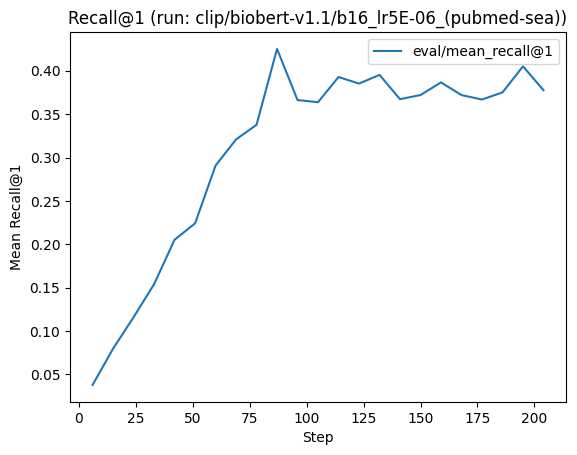

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
202         NaN
203         NaN
204    0.377651
205         NaN
206         NaN
Name: eval/mean_recall@1, Length: 207, dtype: float64

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Get history of the first run
run = runs[-1]
hist: pd.DataFrame = run.history()

col_name = "eval/mean_recall@1"
data = hist[col_name].dropna()
if col_name in hist.columns:
    plt.plot(data.index, data, label=col_name)
    plt.xlabel("Step")
    plt.ylabel("Mean Recall@1")
    plt.title(f"Recall@1 (run: {run.name})")
    plt.legend()
    plt.show()
else:
    print("recall@1 not found in history columns. Available:", hist.columns.tolist())
hist[col_name]